## Plotting Dispersion

### From Existing Phonon Frequencies

Phonon frequencies and eigenvectors can be read in
from a pre-existing .phonon file

In [2]:
from euphonic import QpointPhononModes

phonons = QpointPhononModes.from_castep('castep_files/graphite.phonon')

Then we can plot the frequencies using `plot_dispersion`

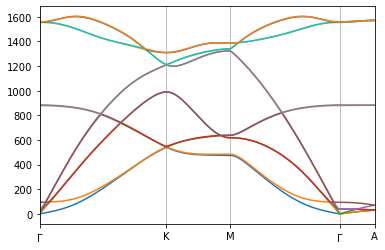

In [9]:
from euphonic.plot import plot_dispersion

fig = plot_dispersion(phonons)

The frequency units can be changed by changing
`QpointPhononModes.frequencies_unit`, which will
be reflected in the plot

In [7]:
phonons.frequencies_unit = '1/cm'

We can also change some of the plot options, such
as adding axis titles, and changing the lower limit
on the y-axis.

`pint.Quantity` objects are used to store data with
units in Euphonic, and support pretty printing, so this can
be used to automatically generate axis labels with the
correct units, as seen in the `y_label` argument

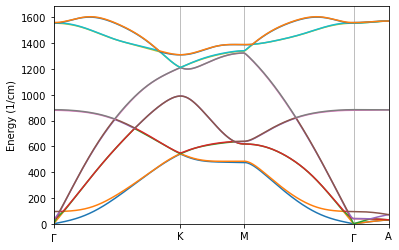

In [13]:
fig = plot_dispersion(phonons, y_min=0,
                      y_label=f'Energy ({phonons.frequencies.units:~P})')

### From Force Constants

We can also calculate and then plot frequencies from
force constants. First read in the force constants:

In [14]:
from euphonic import ForceConstants

fc = ForceConstants.from_castep('castep_files/quartz.castep_bin')

We can use `seekpath` to generate a nice 'recommended' q-point path

In [18]:
import seekpath
import numpy as np

_, unique_atoms = np.unique(fc.crystal.atom_type, return_inverse=True)
structure = (fc.crystal.cell_vectors.magnitude,
             fc.crystal.atom_r, unique_atoms)
qpts = seekpath.get_explicit_k_path(structure)["explicit_kpoints_rel"]

We can then use `calculate_qpoint_phonon_modes` to interpolate the
force constants to create a `QpointPhononModes` object containing
all the frequencies and eigenvectors at those q-points

`asr` describes which acoustic sum rule to use, either 'realspace'
or 'reciprocal'

`insert_gamma` will allow extra gamma points to be inserted into qpts
so LO-TO splitting can be seen

There are many more options, try
`help(ForceConstants.calculate_qpoint_phonon_modes)` for details

In [25]:
phonons = fc.calculate_qpoint_phonon_modes(qpts, asr='reciprocal', insert_gamma=True)


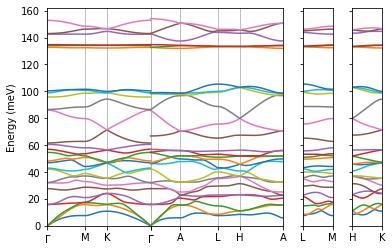

In [26]:
fig = plot_dispersion(phonons, y_min=0,
                      y_label=f'Energy ({phonons.frequencies.units:~P})')

Automatically `plot_dispersion` puts breaks in q-space on
separate subplots, this behaviour can be controlled by
the `btol` argument, set it higher to increase the
threshold for plotting on different subplots

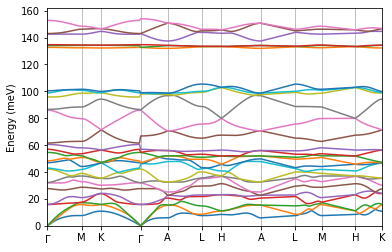

In [24]:
fig = plot_dispersion(phonons, y_min=0,
                      y_label=f'Energy ({phonons.frequencies.units:~P})',
                      btol=1000)